<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Transfer_Learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL.Image as Image
import PIL

from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

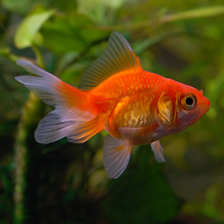

In [ ]:
gold_fish = Image.open("/content/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
# Scaled
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

**Flowers Dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

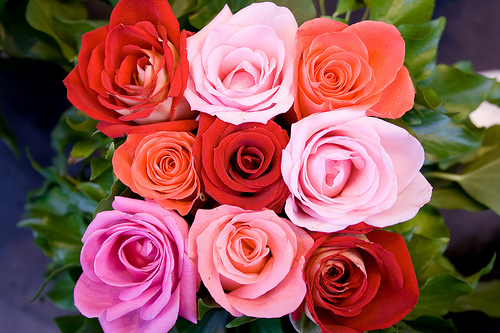

In [ ]:
PIL.Image.open(str(roses[9]))

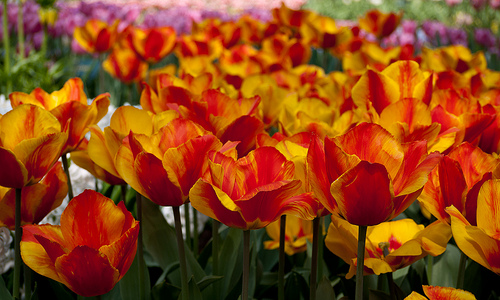

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[4]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(x[0], IMAGE_SHAPE)
x1_resized = cv2.resize(x[1], IMAGE_SHAPE)
x2_resized = cv2.resize(x[2], IMAGE_SHAPE)

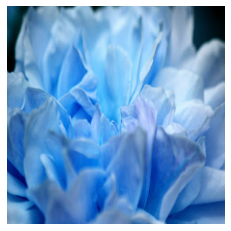

In [ ]:
plt.axis('off')
plt.imshow(x[7])

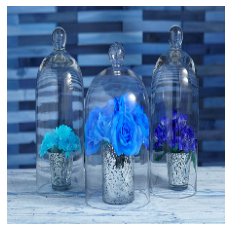

In [ ]:
plt.axis('off')
plt.imshow(x[11])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([612, 795, 795])

In [ ]:
image_labels[795]

'shower curtain'


**Now take pre-trained model and retrain it using flowers images**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train, y_train, epochs=5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
86/86 [==============================] - 72s 792ms/step - loss: 1.6289 - acc: 0.2402
Epoch 2/5
86/86 [==============================] - 68s 795ms/step - loss: 1.5810 - acc: 0.2900
Epoch 3/5
86/86 [==============================] - 68s 794ms/step - loss: 1.5516 - acc: 0.3132
Epoch 4/5
86/86 [==============================] - 68s 795ms/step - loss: 1.5389 - acc: 0.3219
Epoch 5/5
86/86 [==============================] - 71s 823ms/step - loss: 1.5416 - acc: 0.3198


In [ ]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 24s 792ms/step - loss: 5.8158 - acc: 0.2135


[5.815820217132568, 0.21350762248039246]